# Prediction of Mutation Effect


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold">C:\Users\ibrah\Desktop\TUSEB_Study\Prediction_of_Mutation_Effects\Machine_Learning\ML_7</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold">01_Single_protein_single_position.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold">July 9th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

    
- [x] $\textit{mutation effect label}$ prediction using Random Forest algorithm.
    

- [x] Classification will be $\textit{Disrupting vs (No effect + Increasing)}$.
    > $\textit{Disrupting} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$
    
    
- [x] Evaluate the performane of the model.
    
- [x] Training set will be consisting of one type of gene.\
    I have tried with 5 features. Results are not that good.
    
    
**Dependent files:**
* Training (mutations) data:
    - *training_data_M1.txt*


## Setup

In [2]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from IPython.display import display

# To make this notebook's output stable across runs
# np.random.seed(42)

# PATHS
PROJECT_COMMON_FILE_DIR = "../ML_common_files/"
MUTATIONS_PATH = "training_data_M1.txt"

def print_annotation(s):
    print(f"\n{s}\n{'-' * len(s)}")

def get_file_path(filename):
    return os.path.join(PROJECT_COMMON_FILE_DIR, filename)


## Reading the Datasets

### 1. Training Data: Mutations

In [3]:
# Read Training Data
mutations = pd.read_csv(get_file_path(MUTATIONS_PATH), sep='\t')

# Size of dataframe
print_annotation(f"Size of dataframe: {mutations.shape}")

# First 5 entries
mutations.head()


Size of dataframe: (1101, 104)
------------------------------


,Mutation_Effect_Label,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
1,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
2,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
3,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627
4,mutation decreasing rate(MI:1130),P63000,P63000,Q61L,done,interface,-,-,-,Ras,...,378.0,40.0165,40.2638,61.9441,61.9441,None,None,None,3.7681,3.21627


## Data Cleaning

### Select column names

In [4]:
selected_columns = ['Mutation_Effect_Label', 'UniProt_ID', 'Mutation', 'Interactor_UniProt_ID']\
                 + ['Template_sequence_identity', 'Alignment_score', 'ProtBert_score', 'Provean_score', 'Matrix_score']        

### Reduce Columns

#### Train (Mutations) Data

In [5]:
# Declare train data using selected column names
train_data = mutations[selected_columns].copy()

# Size of dataframe
print_annotation(f"Size of dataframe: {train_data.shape}")

# First 5 entries
train_data.head()


Size of dataframe: (1101, 9)
----------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
0,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155,1.0,0.921875,0.9981741060182685,-6.338,-3.0
1,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-1,1.0,0.921875,0.9981741060182685,-6.338,-3.0
2,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-2,1.0,0.921875,0.9981741060182685,-6.338,-3.0
3,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-3,1.0,0.921875,0.9981741060182685,-6.338,-3.0
4,mutation decreasing rate(MI:1130),P63000,Q61L,Q14155-5,1.0,0.921875,0.9981741060182685,-6.338,-3.0


In [6]:
# Dropping the duplicates
train_data.drop_duplicates(keep="first", inplace=True)

Ensuring that there is no duplicated row.

In [7]:
train_data[train_data.duplicated()].empty  # True, duplicate is empty

True

In [8]:
train_data.shape

(1098, 9)

## Data Preprocessing

* [x] Not all selected columns are interpreted as numeric, so coerce them to numeric.

### Mutation Effect Label Binning

Mutation Effect label binning is only applied to train_data.

* [x] Apply Label binning.
    > $\textit{Disruptive} → 0$\
    > $\textit{No effect + Increasing} → 1$\
    > $\textit{Decreasing} → \textit{ignored}$


In [9]:
def display_label_counts(data_param):
    """
    Display a dataframe that contains label categories and their counts.
    """
    label_counts = pd.DataFrame(data_param["Mutation_Effect_Label"].value_counts())
    label_counts.reset_index(inplace=True)
    label_counts.columns = ["Mutation_Effect_Label", "Counts"]
    label_counts.rename(index={0: 'Disrupting', 1: 'Increasing + No Effect'}, inplace=True)
    display(label_counts)

In [10]:
def display_labels(data_param):
    """
    Display a dataframe that contains label categories.
    """
    label_counts = pd.DataFrame(data_param["Mutation_Effect_Label"].value_counts().index)
    label_counts.columns = ["Mutation_Effect_Label"]
    display(label_counts)

For $\textit{mutation effect label}$ we have following categories:

In [11]:
# Displaying possible label categories.
display_labels(train_data)

,Mutation_Effect_Label
0,mutation disrupting(MI:0573)
1,mutation decreasing(MI:0119)
2,mutation disrupting strength(MI:1128)
3,mutation decreasing strength(MI:1133)
4,mutation with no effect(MI:2226)
5,disrupting
6,mutation increasing(MI:0382)
7,mutation increasing strength(MI:1132)
8,mutation decreasing rate(MI:1130)
9,mutation disrupting rate(MI:1129)


Applying binning operation on $\textit{mutation effect label}$ column in $\textit{mutations}$ data with described rule below \
    - $\textit{Disrupting} → 0$\
    - $\textit{No effect + Increasing} → 1$\
    - $\textit{Decreasing} → \textit{dropped}$\
    - $\textit{Causing} → \textit{dropped}$\
yields following data frame:

In [12]:
labels_to_bins = { 
    "mutation disrupting(MI:0573)": 0,
    "mutation decreasing(MI:0119)": "IGNORED",
    "mutation disrupting strength(MI:1128)": 0,
    "mutation decreasing strength(MI:1133)": "IGNORED",
    "mutation with no effect(MI:2226)": 1,
    "disrupting": 0,
    "mutation increasing(MI:0382)": 1,
    "mutation increasing strength(MI:1132)": 1,
    "mutation decreasing rate(MI:1130)": "IGNORED",
    "mutation disrupting rate(MI:1129)": 0,
    "mutation causing(MI:2227)": "IGNORED",
    "mutation increasing rate(MI:1131)": 1}

replace_map = {"Mutation_Effect_Label": labels_to_bins}

In [13]:
# Size of dataframe before binning.
print_annotation(f"Size of dataframe before binning: {train_data.shape}")

# Modifications will be done on train_data_binned.
train_data_binned = train_data.copy()

# Replace the labels as described above.
train_data_binned.replace(replace_map, inplace=True)

# Drop the entries with "IGNORED": 'mutation cusing' in this case.
train_data_binned = train_data_binned[train_data_binned["Mutation_Effect_Label"] != "IGNORED"]

# Reset index of the dataframe to avoid any possible errors
train_data_binned.reset_index(drop=True, inplace=True)

# Size of dataframe after binning.
print_annotation(f"Size of dataframe after binning: {train_data_binned.shape}")

# First 5 rows of binned data.
train_data_binned.head()


Size of dataframe before binning: (1098, 9)
-------------------------------------------

Size of dataframe after binning: (740, 9)
-----------------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,-0.09227252565324306,-5.895,-3.0
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.998749150385265,-8.175,-3.0
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,0.2882971949657076,-7.553,-4.0
3,0,Q96QK1,F534D,Q9UBQ0-2,1.0000,0.360743,0.2882971949657076,-7.553,-4.0
4,0,O43521-3,G66A,Q07812,1.0000,0.714286,-0.051025405526161194,-4.158,0.0


Confirming replacement of values are properly done. $\textit{Mutation_Effect_Label}$ only contains of $0$ or $1$.

In [14]:
train_data_binned["Mutation_Effect_Label"].value_counts()

0    540
1    200
Name: Mutation_Effect_Label, dtype: int64

### Type Coercion

Some columns have been interpreted as `object` type, eventhough they are actually numeric.

In [15]:
# Train (mutations) data
set(train_data_binned.dtypes)

{dtype('float64'), dtype('O')}

These non-numeric interpereted columns will be coerced. $\textit{NaN}$ values will be converted to $0$.

In [16]:
# Get column names where its type is *not* int or float, i.e. whose type is object.
coerce_numeric_cols = set([cname for cname in train_data_binned.columns if train_data_binned[cname].dtype not in ['int64', 'float64']])
#                         + [cname for cname in target_brca_data.columns if target_brca_data[cname].dtype not in ['int64', 'float64']]) # \ 
#                         + [cname for cname in target_coad_data.columns if target_coad_data[cname].dtype not in ['int64', 'float64']]\
#                         + [cname for cname in target_ov_data.columns if target_ov_data[cname].dtype not in ['int64', 'float64']])

# Remove target variable from the list
coerce_numeric_cols = coerce_numeric_cols - {"Mutation_Effect_Label", "UniProt_ID", "Mutation", "Interactor_UniProt_ID"}

for cname in coerce_numeric_cols:
    train_data_binned[cname] = pd.to_numeric(train_data_binned[cname], errors='coerce')
#     target_brca_data[cname] = pd.to_numeric(target_brca_data[cname], errors='coerce')
#     target_coad_data[cname] = pd.to_numeric(target_coad_data[cname], errors='coerce')
#     target_ov_data[cname] = pd.to_numeric(target_ov_data[cname], errors='coerce')
    
train_data_binned.fillna(0, inplace=True)
# target_brca_data.fillna(0, inplace=True)
# target_coad_data.fillna(0, inplace=True)
# target_ov_data.fillna(0, inplace=True)

Now all columns are interpreted as numeric type, except "_UniProt_ID_", "_Mutation_", "_Interactor_UniProt_ID_"

In [17]:
# Train (mutations) data
set(train_data_binned.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [18]:
train_data_binned.dtypes

Mutation_Effect_Label           int64
UniProt_ID                     object
Mutation                       object
Interactor_UniProt_ID          object
Template_sequence_identity    float64
Alignment_score               float64
ProtBert_score                float64
Provean_score                 float64
Matrix_score                  float64
dtype: object

### Processed train data and Label Counts

In [19]:
def visualize_label_counts(data_param, label_name_param="Mutation_Effect_Label"):
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    ax = sns.barplot(x=data_param[label_name_param].value_counts().index, 
                     y=data_param[label_name_param].value_counts(),
                     palette="ch:s=-.2,r=.6")
    ax.set_title('Disrupting vs Increasing & No Effect')  # ch:s=-.2,r=.6, ocean
    ax.set_ylabel('Value counts')
    ax.set_xticklabels(['Distrupting', 'Increasing + No Effect']);

From now on, training data is refered as `data_processed`.

In [20]:
# Declaing `data_processed`.
data_processed = train_data_binned.copy()

# Size of processed data.
print_annotation(f"Size of processed data: {data_processed.shape}")

# First 5 rows of binned data.
data_processed.head()


Size of processed data: (740, 9)
--------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,-0.092273,-5.895,-3.0
1,0,P01116,Y40C,P50749,0.9277,0.931315,0.998749,-8.175,-3.0
2,0,Q96QK1,F534D,Q9UBQ0,1.0000,0.360743,0.288297,-7.553,-4.0
3,0,Q96QK1,F534D,Q9UBQ0-2,1.0000,0.360743,0.288297,-7.553,-4.0
4,0,O43521-3,G66A,Q07812,1.0000,0.714286,-0.051025,-4.158,0.0


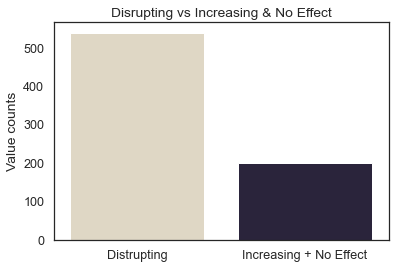

In [21]:
visualize_label_counts(data_processed)

In [22]:
display_label_counts(data_processed)

,Mutation_Effect_Label,Counts
Disrupting,0,540
Increasing + No Effect,1,200


## Data Creation with Unique Proteins

Here, we desire training data to have one occurance of each protein in `UniProt_ID` column.

In [23]:
# Get the unique proteins from `UniProt_ID` column.
unique_proteins = list(data_processed['UniProt_ID'].unique())

# Number of unique_proteins
print('Number of `unique_proteins`:', len(unique_proteins))

# First five proteins
print(unique_proteins[:5])

Number of `unique_proteins`: 164
['Q9BPZ3', 'P01116', 'Q96QK1', 'O43521-3', 'Q13418']


There are $164$ unique proteins in `UniProt_ID` column. Now, we will re-construct the training data where it will have $164$ rows, i.e. one row for each unique protein. In the case where multiple row option possible, we randomly select one.

In [24]:
sampled_row_dataframes = []
for unique_protein in unique_proteins:
    sampled_row_dataframes.append(data_processed[data_processed['UniProt_ID'] == unique_protein].sample())

In [25]:
# Merge row dataframes into single dataframe, stack rows on top of each other.
sampled_train_data = pd.concat(sampled_row_dataframes)

# Reset index of the dataframe to avoid any possible errors
sampled_train_data.reset_index(drop=True, inplace=True)

# Dimensions of dataframe
print_annotation(f"Dimensions of sampled_dataframe: {sampled_train_data.shape}")

# First five entries
sampled_train_data.head()


Dimensions of sampled_dataframe: (164, 9)
-----------------------------------------


,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
0,0,Q9BPZ3,F118A,P11940,1.0000,1.000000,-0.092273,-5.895,-3.0
1,0,P01116,E37G,P50749,0.9277,0.931315,0.999487,-5.816,-3.0
2,0,Q96QK1,F541D,Q9UBQ0-2,1.0000,0.360743,0.002166,-4.606,-4.0
3,0,O43521-3,G66E,Q07812-4,1.0000,0.657143,-0.029202,-6.236,-3.0
4,1,Q13418,Q362H,Q9NVD7,0.9925,0.971054,0.206189,-3.940,1.0


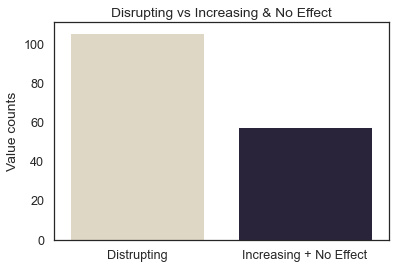

In [26]:
visualize_label_counts(sampled_train_data)

In [27]:
display_label_counts(sampled_train_data)

,Mutation_Effect_Label,Counts
Disrupting,0,106
Increasing + No Effect,1,58


## Prepare the Train Data for Machine Learning Algorithms

Remove "_UniProt_ID_", "_Mutation_", "_Interactor_UniProt_ID_" columns, since they are not feature columns.

In [28]:
sampled_train_data = sampled_train_data.drop(["UniProt_ID", "Mutation", "Interactor_UniProt_ID"], axis='columns')

### Shuffle the data

In [29]:
# Shuffle the rows in data_prepared:
data_prepared = sampled_train_data.sample(frac=1, random_state=96).reset_index(drop=True).copy()

### Train and Validation variables

Splitting `data_prepared` into training set and validation set using random splitting:

In [30]:
from sklearn.model_selection import train_test_split

random_train_set, random_valid_set = train_test_split(
    data_prepared, test_size=0.2, random_state=42)

print(random_train_set.shape, random_valid_set.shape)

(131, 6) (33, 6)


In [31]:
random_train_set.head()

,Mutation_Effect_Label,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
84,0,0.3020,0.182182,0.084937,-4.047,-2.0
2,0,0.4419,0.258090,0.281697,-6.168,-3.0
94,1,1.0000,0.421622,0.794942,-4.400,-3.0
45,1,0.9865,0.987175,0.127309,-1.327,1.0
42,0,0.5104,0.405917,0.934410,-4.729,-1.0


Splitting `train_data` into training set and validation set using stratified random splitting, we get something like (with `random_state=42` in shuffle):
```python
>>> train_index
array([513, 676, 164, 520,  23], dtype=int64)
```
**Note:** Due to the shuffling, it may change when different `random_state` is provided in shuffling.

StratifiedShuffleSplit and StratifiedKFold returns the *different* permutation of numbers. The following cell contains `n_splits=1`, meaning that it is used for generation of a sequence of numbers in a random order.

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(data_prepared, data_prepared["Mutation_Effect_Label"]):
    strat_train_set = data_prepared.iloc[train_index]
    strat_valid_set = data_prepared.iloc[valid_index]

In [33]:
train_index[:5]

array([ 80,  10,  17, 107,  59], dtype=int64)

In [34]:
strat_train_set.head()

,Mutation_Effect_Label,Template_sequence_identity,Alignment_score,ProtBert_score,Provean_score,Matrix_score
80,0,0.3095,0.201429,0.996520,-4.523,-2.0
10,1,0.2604,0.269226,0.430199,-3.223,-1.0
17,0,1.0000,0.821429,-0.006916,-2.854,-3.0
107,0,1.0000,0.862069,0.031112,-10.620,-3.0
59,1,0.8624,0.861377,-0.063936,-7.998,-2.0


In [35]:
strat_train_set.shape, strat_valid_set.shape

((131, 6), (33, 6))

In [36]:
def label_proportions(data_param):
    return data_param["Mutation_Effect_Label"].value_counts() / len(data_param)

compare_props = pd.DataFrame({
    "Overall": label_proportions(data_prepared),
    "Stratified": label_proportions(strat_valid_set),
    "Random": label_proportions(random_valid_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props.rename(index={0: 'Disruptive', 1: 'Increasing + No Effect'}, inplace=True)
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Disruptive,0.646341,0.636364,0.69697,7.833047,-1.543739
Increasing + No Effect,0.353659,0.363636,0.30303,-14.315569,2.821317


Splitting data randomly results in representativeness error, therefore, `strat_train_set` and `strat_valid_set` can be used.

### Declare `X_train`, `y_train`, `X_valid`, `y_valid`

In [37]:
# All data, i.e. data_prepared
X = data_prepared.drop(["Mutation_Effect_Label"], axis="columns")
y = data_prepared["Mutation_Effect_Label"].copy()

In [38]:
# Stratified version
X_train = strat_train_set.drop(["Mutation_Effect_Label"], axis="columns")
y_train = strat_train_set["Mutation_Effect_Label"].copy()
X_valid = strat_valid_set.drop(["Mutation_Effect_Label"], axis="columns")
y_valid = strat_valid_set["Mutation_Effect_Label"].copy()
# Printing their shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(131, 5) (131,)
(33, 5) (33,)


In [39]:
# Randomized version
X_train_random = random_train_set.drop(["Mutation_Effect_Label"], axis="columns")
y_train_random = random_train_set["Mutation_Effect_Label"].copy()
X_valid_random = random_valid_set.drop(["Mutation_Effect_Label"], axis="columns")
y_valid_random = random_valid_set["Mutation_Effect_Label"].copy()
# Printing their shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(131, 5) (131,)
(33, 5) (33,)


# Machine Learning Utils

In [40]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from itertools import combinations
import seaborn as sns

In [41]:
def cross_validation_options(cv_option_param, n_jobs_param=-1):
    """
    A helper function that returns (my) desired cv_option and n_jobs.
    """
    
    # Options for cross-validation cv= parameter.
    if isinstance(cv_option_param, int):
        cv_option_param = cv_option_param
    elif cv_option_param == "skf_5":
        cv_option_param = StratifiedKFold(shuffle=True, n_splits=5)
    elif cv_option_param == "skf_10":
        cv_option_param = StratifiedKFold(shuffle=True, n_splits=10)
    elif cv_option_param == "kf_5":
        cv_option_param = KFold(shuffle=True, n_splits=5)
    elif cv_option_param == "kf_10":
        cv_option_param = KFold(shuffle=True, n_splits=10)
    else:
        raise ValueError("cv_option value error!")
        
    # Option for j_jobs:
    n_jobs_param = -1
    
    return cv_option_param, n_jobs_param

# Classification: Initial Insights

In [42]:
attributes = list(X.columns)

# Plotting feature importance in barplot
def plot_feature_importances(feature_importances):
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)

    plt.figure(figsize=(5, 20))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances')
    plt.show()
    
    
# Plotting top n feature importance in barplot
def plot_top_feature_importances(feature_importances, top_n=10, figsize=None):
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

### Initial Scoring

In [49]:
# Initial scoring: X_train, y_train with prediction of X_valid
forest_clf_inital = RandomForestClassifier(random_state=42)

forest_clf_inital.fit(X_train, y_train)

forest_predictions = forest_clf_inital.predict(X_valid)

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

Balanced accuracy score : 0.6369
Accuracy score		: 0.6970


### Initial Feature Importance

In [50]:
attributes = list(X.columns)

In [51]:
# plot_feature_importances(forest_clf_inital.feature_importances_)

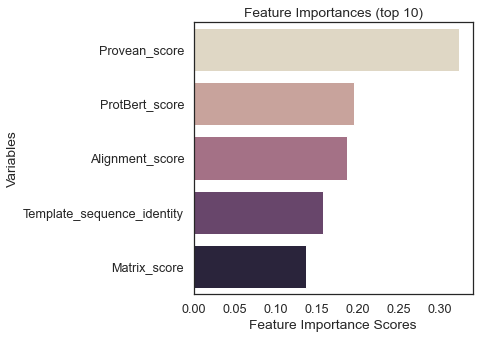

In [52]:
plot_top_feature_importances(forest_clf_inital.feature_importances_, top_n=10, 
                             figsize=(5,5))

In [53]:
forest_clf_inital.feature_importances_

array([0.15759622, 0.18677042, 0.19522885, 0.32392222, 0.13648229])

# Classification

## Initial Insights

In [54]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [55]:
feature_columns = list(data_prepared.columns)[1:]

# Plotting feature importance in barplot
def plot_feature_importances(feature_importances):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)

    plt.figure(figsize=(5, 20))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances')
    plt.show()
    
    
# Plotting top n feature importance in barplot
def plot_top_feature_importances(feature_importances, top_n=10, figsize=None):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                               index = attributes).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

In [56]:
# Initial scoring: X_train, y_train with prediction of X_valid
forest_clf_inital = RandomForestClassifier(random_state=42)

forest_clf_inital.fit(X_train, y_train)

forest_predictions = forest_clf_inital.predict(X_valid)

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

Balanced accuracy score : 0.6369
Accuracy score		: 0.6970


In [57]:
def evaluate_cross_val(X_train_param, y_train_param, cv_option_param):
        
    # Cross Validation options
    cv_option, n_jobs = cross_validation_options(cv_option_param, -1)
    
    # Model
    forest_clf = RandomForestClassifier(random_state=42)
    
    # Cross-validation Accuracy and Balanced Accuracy Scores
    forest_scores_bas = cross_val_score(forest_clf, 
                                        X_train_param, y_train_param,
                                        cv=cv_option, scoring="balanced_accuracy", n_jobs=n_jobs)

    forest_scores_as = cross_val_score(forest_clf, 
                                       X_train_param, y_train_param,
                                       cv=cv_option, scoring="accuracy", n_jobs=n_jobs)
    
    # Print scores and averages
    print("Balanced accuracy score AVG : {:.4f}".format(forest_scores_bas.mean()))
#     print(forest_scores_bas)
    print("Accuracy score AVG          : {:.4f}".format(forest_scores_as.mean()))
#     print(forest_scores_as)

In [58]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6532
Accuracy score AVG          : 0.6945


In [59]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6520
Accuracy score AVG          : 0.7096


In [60]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6329
Accuracy score AVG          : 0.7254


In [61]:
evaluate_cross_val(X_train, y_train, "skf_5")

Balanced accuracy score AVG : 0.6294
Accuracy score AVG          : 0.6954


In [62]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6645
Accuracy score AVG          : 0.6831


In [63]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns

def cross_val_confusion_matrix_via(model_param, X_train_param, y_train_param,
                                   return_report=False):
    
    skf = StratifiedKFold(shuffle=True, n_splits=10)
    y_pred_temp = cross_val_predict(model_param, X_train_param, y_train_param, cv=skf)
    
    label_names = ["Disrupting", "NoEffect+Increasing"]
       
    sns.heatmap(confusion_matrix(y_train_param, y_pred_temp), annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names)
    plt.title(r'$\mathbf{Confusion\ Matrix}$', fontsize=16, fontweight='bold')
    plt.ylabel('Actual', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted', fontsize=16, fontweight='bold')
    plt.show()
    
    if return_report:
        print(classification_report(y_train_param, y_pred_temp, target_names=label_names))
  

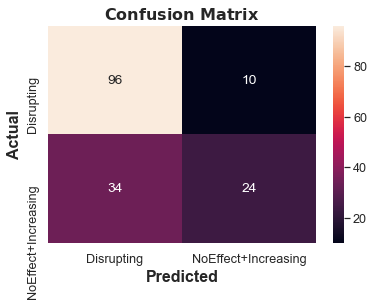

                     precision    recall  f1-score   support

         Disrupting       0.74      0.91      0.81       106
NoEffect+Increasing       0.71      0.41      0.52        58

           accuracy                           0.73       164
          macro avg       0.72      0.66      0.67       164
       weighted avg       0.73      0.73      0.71       164



In [64]:
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X, y, return_report=True)

## Exhoustively Selected Features

In [65]:
# X_mfs = X[['EL2_score', 'Provean_score', 'Matrix_score', 'Final_ddG']]
# X_Alignment_score = X[['Alignment_score']]
# X_Provean_score = X[['Provean_score']]
# X_selected_11 = X[['Template_sequence_identity', 'Alignment_score', 'Interactor_template_sequence_identity', 'Interactor_alignment_score', 'Final_ddG', 'ProtBert_score', 'ProteinSolver_score', 'EL2_score', 'Model/DOPE_score', 'Provean_score', 'Matrix_score']]

# # 3
# X_selected_exhaustive_3_1 = X[['Template_sequence_identity', 'Alignment_score', 'Provean_score']]
# X_selected_exhaustive_3_2 = X[['Template_sequence_identity', 'Provean_score', 'Matrix_score']]

# # 4
# X_selected_exhaustive_4_1 = X[['Template_sequence_identity', 'Alignment_score', 'ProtBert_score', 'Matrix_score']]
# X_selected_exhaustive_4_2 = X[['Template_sequence_identity', 'ProtBert_score', 'Provean_score', 'Matrix_score']]
# X_selected_exhaustive_4_3 = X[['Alignment_score', 'ProtBert_score', 'Provean_score', 'Matrix_score']]

# # 5
# X_selected_exhaustive_5 = X[['Template_sequence_identity', 'Alignment_score', 'ProtBert_score', 'Provean_score', 'Matrix_score']]

In [92]:
# X_benchmark_feature_names_dataframes =\
# [("X_Alignment_score", X_Alignment_score), 
#  ("X_Provean_score", X_Provean_score), 
#  ("X_selected_11", X_selected_11), 
#  ("X_selected_exhaustive_3_1", X_selected_exhaustive_3_1), 
#  ("X_selected_exhaustive_3_2", X_selected_exhaustive_3_2), 
#  ("X_selected_exhaustive_4_1", X_selected_exhaustive_4_1), 
#  ("X_selected_exhaustive_4_2", X_selected_exhaustive_4_2), 
#  ("X_selected_exhaustive_4_3", X_selected_exhaustive_4_3), 
#  ("X_selected_exhaustive_5", X_selected_exhaustive_5),  
#  ("X_mfs", X_mfs), 
#  ('X', X)]

In [67]:
X_benchmark_feature_names_dataframes = [("X", X)]

## Evaluation Metrics

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [69]:
def cross_val_score_feature_comparison(X_param, y_param, scoring_param):
    
    return(round(cross_val_score(RandomForestClassifier(), 
                                X_param, y_param, 
                                cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=10), 
                                scoring=scoring_param, n_jobs=-1).mean(), 4))

In calculation of scores, cross-validation is repeated 10 times, which yields a total of 100 folds.

### Scores

#### F1 score

In [70]:
# Testing F1 score
f1_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "f1")
    f1_scores_comparison.append(scores)
    print("{: <28}: {}".format(X_item_name, scores))

X                           : 0.5049


#### balanced_accuracy score

In [71]:
# Testing balanced_accuracy score
balanced_acc_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "balanced_accuracy")
    balanced_acc_scores_comparison.append(scores)
    print("{: <28}: {}".format(X_item_name, scores))

X                           : 0.6513


#### accuracy score

In [72]:
# Testing accuracy score
acc_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "accuracy")
    acc_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.7046


#### f1-macro score

In [73]:
# Testing f1-macro score
f1_macro_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "f1_macro")
    f1_macro_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.6602


#### f1-micro score

In [74]:
# Testing f1-micro score
f1_micro_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "f1_micro")
    f1_micro_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.7198


#### precision score

In [75]:
# Testing precision score
precision_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "precision")
    precision_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.66


#### recall score

In [76]:
# Testing recall score
recall_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "recall")
    recall_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.45


#### roc auc

In [77]:
# Testing roc auc score
roc_auc_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "roc_auc")
    roc_auc_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.7303


#### precision_macro

In [78]:
# Testing precision_macro score
precision_macro_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "precision_macro")
    precision_macro_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.6937


#### precision_micro

In [79]:
# Testing precision_micro score
precision_micro_scores_comparison = []
for X_item_name, X_item in X_benchmark_feature_names_dataframes:
    scores = cross_val_score_feature_comparison(X_item, y, "precision_micro")
    precision_micro_scores_comparison.append(scores)
    print("{: <25}: {}".format(X_item_name, scores))

X                        : 0.7164


### Scores Table

In [80]:
scoring_metrics_table =\
pd.DataFrame({
    "F1": f1_scores_comparison,
    "Balanced Acc": balanced_acc_scores_comparison,
    "Accuracy": acc_scores_comparison,
    "F1 Macro": f1_macro_scores_comparison,
    "F1 Micro": f1_micro_scores_comparison,
    "Precision": precision_scores_comparison,
    "Recall": recall_scores_comparison,
    "ROC_AUC": roc_auc_scores_comparison,
    "Precision Macro": precision_macro_scores_comparison,
    "Precision Micro": precision_micro_scores_comparison,
}, index=[e[0] for e in X_benchmark_feature_names_dataframes])

In [81]:
scoring_metrics_table

,F1,Balanced Acc,Accuracy,F1 Macro,F1 Micro,Precision,Recall,ROC_AUC,Precision Macro,Precision Micro
X,0.5049,0.6513,0.7046,0.6602,0.7198,0.66,0.45,0.7303,0.6937,0.7164


In [ ]:
# Copy for pasting Excel sheet.
scoring_metrics_table.to_clipboard()

#### Matthews Corr Coeff (Additional)

In [69]:
from sklearn.metrics import matthews_corrcoef

In [70]:
def benchmark_matthews_corrcoef(X_train_param, y_train_param,
                                X_valid_param, y_valid_param):
    """
    Evaluate matthews corrcoef of given input on RandomForestClassifier.
    """
    clf = RandomForestClassifier()
    clf.fit(X_train_param, y_train_param)
    preds = clf.predict(X_valid_param)
    print("MCC: {:.4f}".format(matthews_corrcoef(y_valid_param, preds)))

In [71]:
X_train_Alignment_score = X_train[['Alignment_score']]
X_train_Provean_score = X_train[['Provean_score']]
X_train_selected_11 = X_train[['Template_sequence_identity', 'Alignment_score', 'Interactor_template_sequence_identity', 'Interactor_alignment_score', 'Final_ddG', 'ProtBert_score', 'ProteinSolver_score', 'EL2_score', 'Model/DOPE_score', 'Provean_score', 'Matrix_score']]
X_train_selected_exhaustive_3_1 = X_train[['Template_sequence_identity', 'Alignment_score', 'Provean_score']]
X_train_selected_exhaustive_5 = X_train[['Template_sequence_identity', 'Alignment_score', 'ProtBert_score', 'Provean_score', 'Matrix_score']]

In [72]:
X_valid_Alignment_score = X_valid[['Alignment_score']]
X_valid_Provean_score = X_valid[['Provean_score']]
X_valid_selected_11 = X_valid[['Template_sequence_identity', 'Alignment_score', 'Interactor_template_sequence_identity', 'Interactor_alignment_score', 'Final_ddG', 'ProtBert_score', 'ProteinSolver_score', 'EL2_score', 'Model/DOPE_score', 'Provean_score', 'Matrix_score']]
X_valid_selected_exhaustive_3_1 = X_valid[['Template_sequence_identity', 'Alignment_score', 'Provean_score']]
X_valid_selected_exhaustive_5 = X_valid[['Template_sequence_identity', 'Alignment_score', 'ProtBert_score', 'Provean_score', 'Matrix_score']]

In [73]:
benchmark_matthews_corrcoef(X_train, y_train, X_valid, y_valid)

MCC: 0.7522


In [74]:
benchmark_matthews_corrcoef(X_train_Provean_score, y_train, X_valid_Provean_score, y_valid)

MCC: 0.7066


In [75]:
benchmark_matthews_corrcoef(X_train_selected_11, y_train, X_valid_selected_11, y_valid)

MCC: 0.7891


In [76]:
benchmark_matthews_corrcoef(X_train_selected_exhaustive_3_1, y_train, 
                            X_valid_selected_exhaustive_3_1, y_valid)

MCC: 0.8613


In [77]:
benchmark_matthews_corrcoef(X_train_selected_exhaustive_5, y_train, 
                            X_valid_selected_exhaustive_5, y_valid)

MCC: 0.8961


### Confusion Matrices

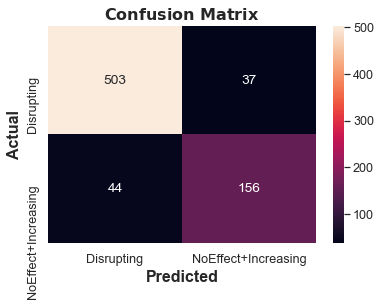

                     precision    recall  f1-score   support

         Disrupting       0.92      0.93      0.93       540
NoEffect+Increasing       0.81      0.78      0.79       200

           accuracy                           0.89       740
          macro avg       0.86      0.86      0.86       740
       weighted avg       0.89      0.89      0.89       740



In [79]:
# X_Provean_score
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_Provean_score, y, return_report=True)

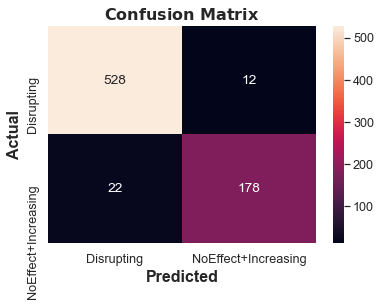

In [80]:
# X_selected_exhaustive_5
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_selected_exhaustive_5, y)

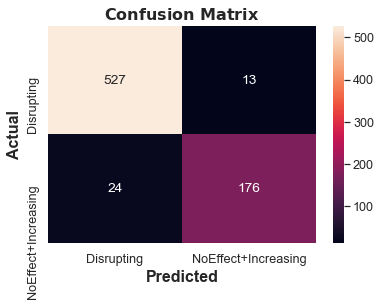

                     precision    recall  f1-score   support

         Disrupting       0.96      0.98      0.97       540
NoEffect+Increasing       0.93      0.88      0.90       200

           accuracy                           0.95       740
          macro avg       0.94      0.93      0.94       740
       weighted avg       0.95      0.95      0.95       740



In [81]:
# X_selected_exhaustive_3_1
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X_selected_exhaustive_3_1, y, return_report=True)

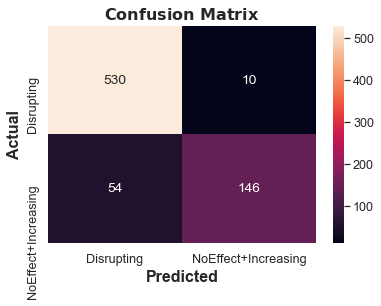

In [82]:
# X
cross_val_confusion_matrix_via(RandomForestClassifier(random_state=42),
                               X, y)

### Cross Val Scores

In [83]:
evaluate_cross_val(X, y, "skf_5")

Balanced accuracy score AVG : 0.6438
Accuracy score AVG          : 0.7076


In [84]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.6767
Accuracy score AVG          : 0.6952


In [84]:
evaluate_cross_val(X_selected_exhaustive_3_1, y, "skf_10")

Balanced accuracy score AVG : 0.9202
Accuracy score AVG          : 0.9338


In [85]:
evaluate_cross_val(X_selected_exhaustive_5, y, "skf_10")

Balanced accuracy score AVG : 0.9073
Accuracy score AVG          : 0.9338


In [86]:
evaluate_cross_val(X, y, "skf_10")

Balanced accuracy score AVG : 0.8495
Accuracy score AVG          : 0.9081


# Fine Tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [88]:
def plot_top_feature_importances_final(feature_importances, attributes_param, top_n=10, figsize=None):
    feature_imp_series = pd.Series(feature_importances,
                                   index = attributes_param).sort_values(ascending=False)
    
    figsize = (5 , top_n//3) if not figsize else (5, 5)
    
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    feature_imp_series_top_n = feature_imp_series[:top_n]
    plt.figure(figsize=figsize)
    sns.barplot(x=feature_imp_series_top_n, y=feature_imp_series_top_n.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importance Scores')
    plt.ylabel('Variables')
    plt.title('Feature Importances (top {})'.format(top_n))
    plt.show()

In [95]:
param_grid_randomized  = {'bootstrap': [True, False],
                          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'max_features': ['auto', 'sqrt'],
                          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
                         
forest_clf = RandomForestClassifier()
# forest_clf = RandomForestClassifier(random_state=42)

randomized_search = RandomizedSearchCV(forest_clf, param_grid_randomized, n_iter=10,
                                       # random_state=42,    
                                       cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=42), 
                                       scoring='balanced_accuracy', 
                                       return_train_score=True, n_jobs=-1, verbose=2)

randomized_search.fit(X_train_selected_exhaustive_5, y_train)
randomized_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 1000,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [96]:
randomized_search.best_score_

0.9056752114164904

In [97]:
final_model = randomized_search.best_estimator_
final_model

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       n_estimators=1000)

# Final Evalution

**Default Model with `X_train_selected_exhaustive_3_5`**

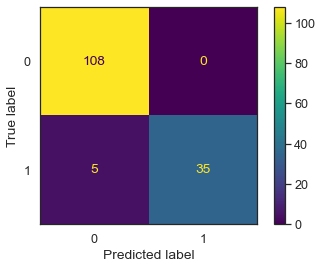

Balanced accuracy score : 0.9375
Accuracy score		: 0.9662


In [98]:
# Final scoring comparison: X_train_selected_exhaustive_5, y_train with prediction of X_valid_selected_exhaustive_5
forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train_selected_exhaustive_5, y_train)

forest_predictions = forest_clf.predict(X_valid_selected_exhaustive_5)

plot_confusion_matrix(forest_clf, X_valid_selected_exhaustive_5, y_valid)
plt.show()

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

**Hyper-param Tuned Model with `X_train_selected_exhaustive_5`**

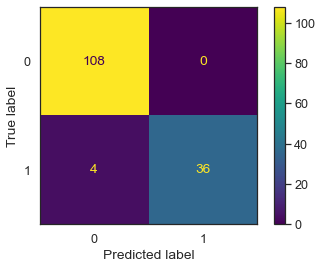

Balanced accuracy score : 0.9500
Accuracy score		: 0.9730


In [99]:
# Final scoring comparison: X_train_selected_exhaustive_5, y_train with prediction of X_valid_selected_exhaustive_5
forest_clf = randomized_search.best_estimator_

forest_clf.fit(X_train_selected_exhaustive_5, y_train)

forest_predictions = forest_clf.predict(X_valid_selected_exhaustive_5)

plot_confusion_matrix(forest_clf, X_valid_selected_exhaustive_5, y_valid)
plt.show()

print("Balanced accuracy score : {:.4f}".format(balanced_accuracy_score(y_valid, forest_predictions)))
print("Accuracy score\t\t: {:.4f}".format(accuracy_score(y_valid, forest_predictions)))

In [100]:
def evaluate_cross_val_avg_via(model_param, X_train_param, y_train_param,
                               plot_param=True, repeation_param=10):
    
    # Options for cross-validation cv= parameter.
    cv_option, n_jobs = cross_validation_options("skf_10", -1)
    repeation=repeation_param
    
    forest_scores_bas, forest_scores_as = [], []
    
    for i in range(repeation):
        
        # Cross-validation Accuracy and Balanced Accuracy Scores
        forest_scores_bas.append(cross_val_score(model_param, 
                                            X_train_param, y_train_param,
                                            cv=cv_option, 
                                            scoring="balanced_accuracy", n_jobs=n_jobs))

        forest_scores_as.append(cross_val_score(model_param, 
                                           X_train_param, y_train_param,
                                           cv=cv_option, 
                                           scoring="accuracy", n_jobs=n_jobs))

        # # Print scores and averages
        # print("Balanced accuracy score AVG : {:.4f}".format(forest_scores_bas[i].mean()))
        # print("Accuracy score AVG          : {:.4f}".format(forest_scores_as[i].mean()))
        
    if plot_param:
        plt.plot(range(1, len(forest_scores_as) + 1), np.array(forest_scores_as).mean(axis=1), "+", color='#265191', alpha=0.5, label="Accuracy_Scores")
        plt.plot(range(1, len(forest_scores_bas) + 1), np.array(forest_scores_bas).mean(axis=1), ".", color='#9F2945', alpha=0.5, label="Balanced_Accuracy_Scores")

        plt.ylim(0.70, 1)
        plt.xticks(range(1, 11))
        plt.legend()
        plt.xlabel("Repetitions")
        plt.ylabel("Scores AVG")
        plt.title("Accuracy and Balanced Accuracy AVG Scores per Repetition")
        plt.show();

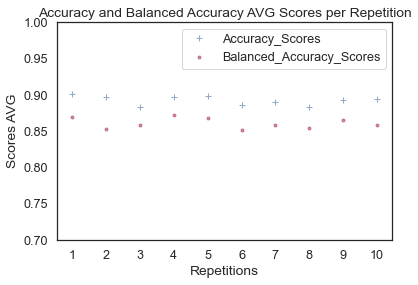

In [101]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X_Provean_score, y)

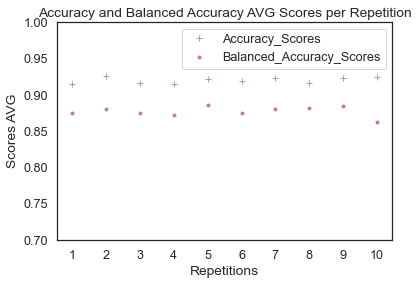

In [102]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X, y)

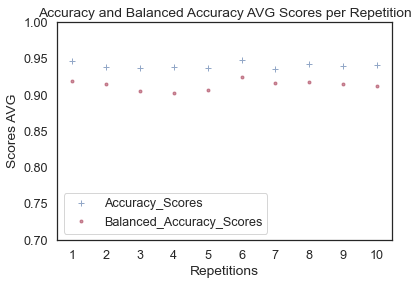

In [103]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X_selected_exhaustive_3_1, y)

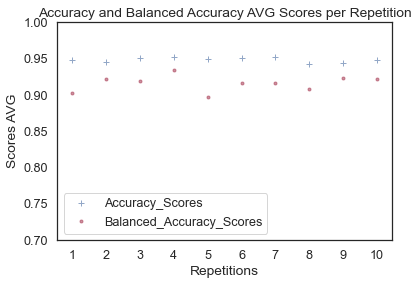

In [104]:
evaluate_cross_val_avg_via(randomized_search.best_estimator_, X_selected_exhaustive_5, y)

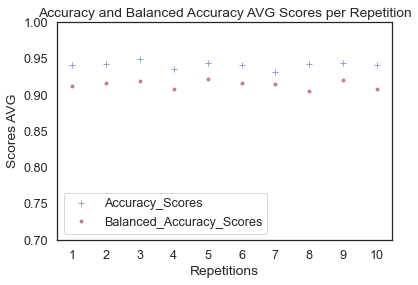

In [105]:
evaluate_cross_val_avg_via(RandomForestClassifier(), X_selected_exhaustive_3_1, y)

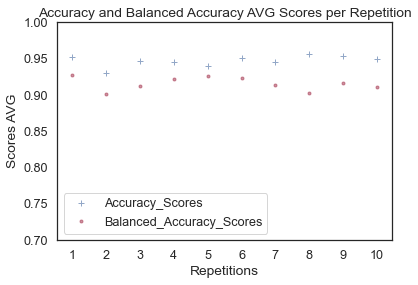

In [106]:
evaluate_cross_val_avg_via(RandomForestClassifier(), X_selected_exhaustive_5, y)

## Final Models

# **CHECK HERE???** **CHECK HERE???** **CHECK HERE???** **CHECK HERE???** **CHECK HERE???**

**Model I: ???**

In [107]:
final_model_randomized = randomized_search.best_estimator_

In [108]:
balanced_accuracy_score(y_valid, final_model_randomized.predict(X_valid_selected_exhaustive_5))

0.95

**Model II: *RandomForestClassifier* fitted with whole train data**

In [109]:
final_model_forest = RandomForestClassifier(random_state=42)

final_model_forest.fit(X_selected_exhaustive_5, y)

RandomForestClassifier(random_state=42)

## Final Features and Importances

In [110]:
def plot_top_feature_importances_final_2(feature_importances, attributes_param):
    attributes = feature_columns
    feature_imp_series = pd.Series(feature_importances,
                                    index = attributes_param).sort_values(ascending=False)

    plt.figure(figsize=(5, 3))
    sns.set(style="white", font_scale=1.15)  # white, dark, whitegrid, darkgrid, ticks
    sns.barplot(x=feature_imp_series, y=feature_imp_series.index, palette="ch:s=-.2,r=.6")
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.title('Feature Importances of Selected Features')
    plt.show()

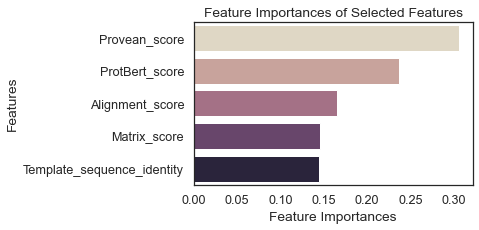

In [111]:
plot_top_feature_importances_final_2(randomized_search.best_estimator_.feature_importances_, X_selected_exhaustive_5.columns)